In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('AD_AE_trial1_withState.csv', header=0)
trial2_results = pd.read_csv('AD_AE_trial2_withState.csv', header=0)
trial3_results = pd.read_csv('AD_AE_trial3_withState.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1,0,[0.02381967],0
1,2,0,[0.01648683],1000
2,3,1,[0.0213191],1900
3,4,1,[0.01890699],2800
4,5,1,[0.04895676],3700
...,...,...,...,...
3001,3002,3,[0.167707],127200
3002,3003,7,[0.167707],126700
3003,3004,2,[0.01318313],127500
3004,3005,2,[0.04047634],128300


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1,0,[0.02381967],0
1,2,1,[0.0213191],900
2,3,1,[0.01890699],1800
3,4,1,[0.04895676],2700
4,5,1,[0.01908752],3600
...,...,...,...,...
3001,3002,7,[0.09565077],-191100
3002,3003,2,[0.01935274],-190300
3003,3004,2,[0.10156969],-189500
3004,3005,6,[0.10156969],-190000


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1,0,[0.02381967],0
1,2,1,[0.0213191],900
2,3,1,[0.01890699],1800
3,4,2,[0.0249368],2600
4,5,3,[0.05425708],3100
...,...,...,...,...
3001,3002,1,[0.03601172],126700
3002,3003,1,[0.01625333],127600
3003,3004,2,[0.03229062],128400
3004,3005,2,[0.02781788],129200


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0,0,0
1,1000,900,900
2,1900,1800,1800
3,2800,2700,2600
4,3700,3600,3100
...,...,...,...
2995,125600,-193000,124000
2996,126100,-193500,124900
2997,125600,-192700,124400
2998,125100,-191900,123900


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0,0,0,0.000000
1,1000,900,900,933.333333
2,1900,1800,1800,1833.333333
3,2800,2700,2600,2700.000000
4,3700,3600,3100,3466.666667
...,...,...,...,...
2995,125600,-193000,124000,18866.666667
2996,126100,-193500,124900,19166.666667
2997,125600,-192700,124400,19100.000000
2998,125100,-191900,123900,19033.333333


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0,0,0,0.000000,0.000000
1,1000,900,900,933.333333,57.735027
2,1900,1800,1800,1833.333333,57.735027
3,2800,2700,2600,2700.000000,100.000000
4,3700,3600,3100,3466.666667,321.455025
...,...,...,...,...,...
2995,125600,-193000,124000,18866.666667,183483.659581
2996,126100,-193500,124900,19166.666667,184175.713202
2997,125600,-192700,124400,19100.000000,183425.161851
2998,125100,-191900,123900,19033.333333,182674.610533


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 933.3333333333334,
 1833.3333333333333,
 2700.0,
 3466.6666666666665,
 4200.0,
 4800.0,
 4233.333333333333,
 3566.6666666666665,
 2733.3333333333335,
 2300.0,
 1866.6666666666667,
 2333.3333333333335,
 2800.0,
 3266.6666666666665,
 3733.3333333333335,
 3700.0,
 3666.6666666666665,
 4100.0,
 4366.666666666667,
 4500.0,
 4600.0,
 4100.0,
 4266.666666666667,
 4100.0,
 3900.0,
 4100.0,
 3866.6666666666665,
 4000.0,
 2966.6666666666665,
 1900.0,
 733.3333333333334,
 -766.6666666666666,
 -2266.6666666666665,
 -3333.3333333333335,
 -4500.0,
 -6000.0,
 -7500.0,
 -8566.666666666666,
 -7733.333333333333,
 -8600.0,
 -9000.0,
 -9400.0,
 -9933.333333333334,
 -10800.0,
 -11666.666666666666,
 -12133.333333333334,
 -12700.0,
 -14533.333333333334,
 -16700.0,
 -18866.666666666668,
 -21033.333333333332,
 -22766.666666666668,
 -24500.0,
 -26333.333333333332,
 -26833.333333333332,
 -27833.333333333332,
 -29500.0,
 -28533.333333333332,
 -27566.666666666668,
 -27100.0,
 -26633.333333333332,
 -26166.66

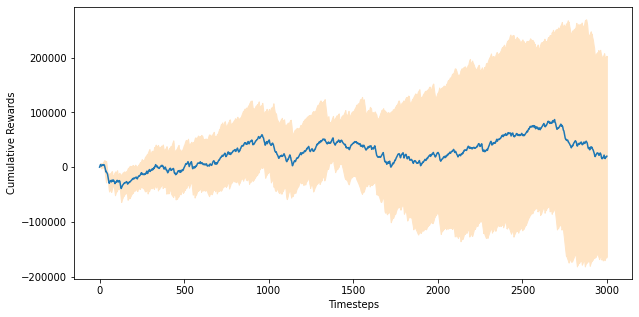

In [37]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(10, 5))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.xlabel('Timesteps')
plt.ylabel('Cumulative Rewards')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0,
 0,
 1,
 1,
 1,
 2,
 3,
 8,
 8,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 7,
 7,
 2,
 6,
 1,
 1,
 2,
 3,
 7,
 7,
 2,
 3,
 7,
 7,
 2,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 7,
 2,
 2,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 7,
 2,
 2,
 3,
 3,
 7,
 2,
 3,
 7,
 7,
 7,
 7,
 2,
 6,
 1,
 2,
 2,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 7,
 2,
 2,
 3,
 7,
 2,
 2,
 2,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 1,
 5,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 7,
 2,
 2,
 3,
 7,
 7,
 2,
 2,
 2,
 6,
 1,
 2,
 3,
 7,
 2,
 3,
 3,
 7,
 7,
 7,
 2,
 2,
 2,
 3,
 7,
 2,
 2,
 2,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 8,
 8,


In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

114

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1,0,[0.02381967],0
1,2,0,[0.01648683],1000
2,3,1,[0.0213191],1900
3,4,1,[0.01890699],2800
4,5,1,[0.04895676],3700
...,...,...,...,...
2995,2996,3,[0.0391332],125600
2996,2997,3,[0.1750124],126100
2997,2998,7,[0.1750124],125600
2998,2999,7,[0.1750124],125100


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[8,
 9,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 162,
 163,
 164,
 165,
 166,
 167,
 249,
 250,
 282,
 283,
 284,
 285,
 321,
 322,
 334,
 335,
 343,
 344,
 345,
 346,
 372,
 373,
 374,
 391,
 392,
 393,
 394,
 395,
 396,
 409,
 448,
 449,
 450,
 451,
 478,
 479,
 492,
 493,
 528,
 529,
 530,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 560,
 561,
 562,
 563,
 599,
 600,
 601,
 622,
 682,
 683,
 684,
 692,
 693,
 694,
 763,
 764,
 765,
 766,
 767,
 824,
 864,
 865,
 866,
 881,
 882,
 883,
 884,
 885,
 905,
 906,
 907,
 942,
 961,
 962,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1025,
 1026,
 1027,
 1028,
 1029,
 1062,
 1071,
 1072,
 1078,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1216,
 1217,
 1240,
 1241

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

93

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 93
Number of instances in trial2 in state 8: 91
Number of instances in trial1 in state 8: 82
Average number of instances in state 8: 88.66666666666667


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 19
Number of instances in trial2 in state 9: 21
Number of instances in trial1 in state 9: 22
Average number of instances in state 9: 20.666666666666668


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 373 timesteps 0.1243 percentage of time in trial 1
Machine is in state 0 for 360 timesteps 0.1200 percentage of time in trial 2
Machine is in state 0 for 335 timesteps 0.1117 percentage of time in trial 3
Machine is in state 0 for 356.0000 timesteps 0.1187 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 453 timesteps 0.1510 percentage of time in trial 1
Machine is in state 1 for 430 timesteps 0.1433 percentage of time in trial 2
Machine is in state 1 for 432 timesteps 0.1440 percentage of time in trial 3
Machine is in state 1 for 438.3333 timesteps 0.1461 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 769 timesteps 0.2563 percentage of time in trial 1
Machine is in state 2 for 723 timesteps 0.2410 percentage of time in trial 2
Machine is in state 2 for 762 timesteps 0.2540 percentage of time in trial 3
Machine is in state 2 for 751.3333 timesteps 0.2504 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 432 timesteps 0.1440 percentage of time in trial 1
Machine is in state 3 for 379 timesteps 0.1263 percentage of time in trial 2
Machine is in state 3 for 442 timesteps 0.1473 percentage of time in trial 3
Machine is in state 3 for 417.6667 timesteps 0.1392 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 68 timesteps 0.0227 percentage of time in trial 1
Machine is in state 4 for 56 timesteps 0.0187 percentage of time in trial 2
Machine is in state 4 for 70 timesteps 0.0233 percentage of time in trial 3
Machine is in state 4 for 64.6667 timesteps 0.0216 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 27 timesteps 0.0090 percentage of time in trial 1
Machine is in state 5 for 25 timesteps 0.0083 percentage of time in trial 2
Machine is in state 5 for 27 timesteps 0.0090 percentage of time in trial 3
Machine is in state 5 for 26.3333 timesteps 0.0088 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 79 timesteps 0.0263 percentage of time in trial 1
Machine is in state 6 for 88 timesteps 0.0293 percentage of time in trial 2
Machine is in state 6 for 81 timesteps 0.0270 percentage of time in trial 3
Machine is in state 6 for 82.6667 timesteps 0.0276 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 262 timesteps 0.0873 percentage of time in trial 1
Machine is in state 7 for 265 timesteps 0.0883 percentage of time in trial 2
Machine is in state 7 for 335 timesteps 0.1117 percentage of time in trial 3
Machine is in state 7 for 287.3333 timesteps 0.0958 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 365 timesteps 0.1217 percentage of time in trial 1
Machine is in state 8 for 407 timesteps 0.1357 percentage of time in trial 2
Machine is in state 8 for 328 timesteps 0.1093 percentage of time in trial 3
Machine is in state 8 for 366.6667 timesteps 0.1222 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 172 timesteps 0.0573 percentage of time in trial 1
Machine is in state 9 for 267 timesteps 0.0890 percentage of time in trial 2
Machine is in state 9 for 188 timesteps 0.0627 percentage of time in trial 3
Machine is in state 9 for 209.0000 timesteps 0.0697 percentage of time on average
